# Part II - Ford GoBike Trip Data Visualization

## by Mofeoluwa Jide-Jegede

## Investigation Overview


> The Questions for this analysis are designed to understand the best times to display advertisements to target specific people. What kind of reach would advertisements have on ford go bike users based on the patterns in the data?

>Some of the questions that would help understand this include:
1. What is the gender distribution across bike stations?
2. What are the busiest weekdays?
3. What is the busiest time of day for riders of different genders?
4. Age distribution of riders
5. Busiest stations at each time of the day
6. Most used bikes?

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for the month of February 2019. 

>The dataset features information about **183412** rides with **16** variables. The columns which represent the variables include:
1. Duration of trip(in seconds)
2. Start time, 
3. End time, 
4. Start_station_id
5. Start_station_name
6. Start_station_latitude
7. Start_station_longitude
8. End_station_id
9. End_station_name
10. End_station_latitude
11. End_station_longitude
12. Bike_id 
13. User_type
14. Member_birth_year
15. Member_gender
16. Bike_share_for_all_trip.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

ford_df=pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
#check for duplicates
sum(ford_df.duplicated())

0

In [4]:
#delete columns that are not needed for analysis 
del_col = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip']

In [5]:
#deleting the columns from the database
ford_df = ford_df.drop(del_col, axis = 1)

In [6]:
#check for null values in the dataset
ford_df.isnull().sum()

duration_sec             0
start_time               0
end_time                 0
start_station_id       197
start_station_name     197
end_station_id         197
end_station_name       197
bike_id                  0
user_type                0
member_birth_year     8265
member_gender         8265
dtype: int64

In [7]:
#store columns with NaN values into an array
stations=['start_station_id','start_station_name', 'end_station_id', 'end_station_name','member_birth_year','member_gender']

In [8]:
#drop rows with NaN values 
ford_df.dropna(subset = stations, inplace = True)

In [9]:
#convert start and end time data type to datetime
ford_df.start_time = pd.to_datetime(ford_df.start_time)
ford_df.end_time = pd.to_datetime(ford_df.end_time)

In [10]:
# create new columns from start_time and end time
ford_df['start_weekday'] = ford_df.start_time.dt.weekday 
ford_df['start_hour'] = ford_df.start_time.dt.hour
ford_df['start_month'] = ford_df.start_time.dt.month_name()



ford_df['end_weekday'] = ford_df.end_time.dt.weekday 
ford_df['end_hour'] = ford_df.end_time.dt.hour
ford_df['end_month'] = ford_df.end_time.dt.month_name()



In [11]:
# convert seconds to minutes
ford_df['duration_minutes'] = ford_df['duration_sec']/60

In [12]:
# convert birth year to Age as at 2019
ford_df['Age'] = 2019 - ford_df['member_birth_year']

In [13]:
#Converting the datatype of the following columns

datatype= { 'start_station_id': 'object',
             'end_station_id': 'object',
            'bike_id': 'object',
            'user_type': 'category',
              'start_weekday': 'object',
           'end_weekday':'object',
           'Age': 'int',
           'duration_minutes':'int'
          }


ford_df = ford_df.astype(datatype)

In [14]:
#In Pandas, it is assumed the day of the week starts with Monday=0 to Sunday=6.
dmap = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [15]:
ford_df['start_weekday'] = ford_df['start_weekday'].map(dmap)
ford_df['end_weekday'] = ford_df['end_weekday'].map(dmap)

In [16]:
#For this analytics, hours before noon would be considered morning, from noon to 18:00 is afternoon 
#from then to 12:00am is evening
ford_df['start_hour'] = (ford_df['start_hour'] % 24 + 4) // 4
ford_df['start_hour'].replace({1: 'Late Night',
               2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

ford_df['end_hour'] = (ford_df['end_hour'] % 24 + 4) // 4
ford_df['end_hour'].replace({1: 'Late Night',
                    2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)




In [22]:
#for the purpose of this analysis, i would drop the other column
Other = ford_df[ ford_df['member_gender'] == 'Other' ].index
  
# drop these row indexes from dataFrame
ford_df.drop(Other, inplace = True)


In [23]:
#drop ages above 80
age_drop = ford_df[ (ford_df['Age'] > 80)].index
  
# drop these given row indexes from dataFrame
ford_df.drop(age_drop, inplace = True)


## User Type Distribution

> The visualization of user type would help Ford GoBike to understand their consumers better and to decide how they could get more subscribers.

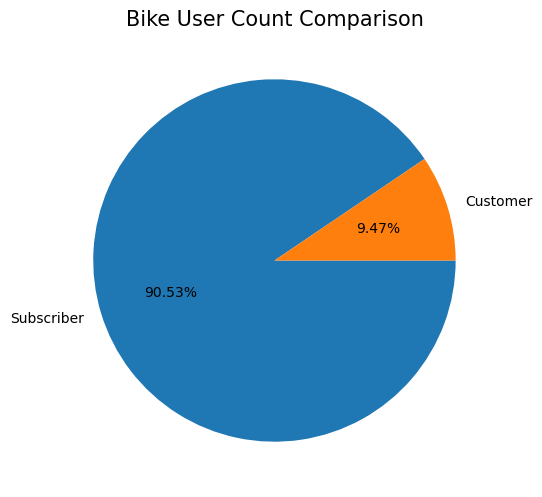

In [19]:
#pie chart of user type
plt.figure(figsize=(20,6), dpi=100)
sc = ford_df['user_type'].value_counts()
plt.pie(sc, labels = sc.index, startangle = 0,
        counterclock = False, autopct='%1.2f%%');
#plt.axis('square')
plt.title('Bike User Count Comparison', fontsize=15);


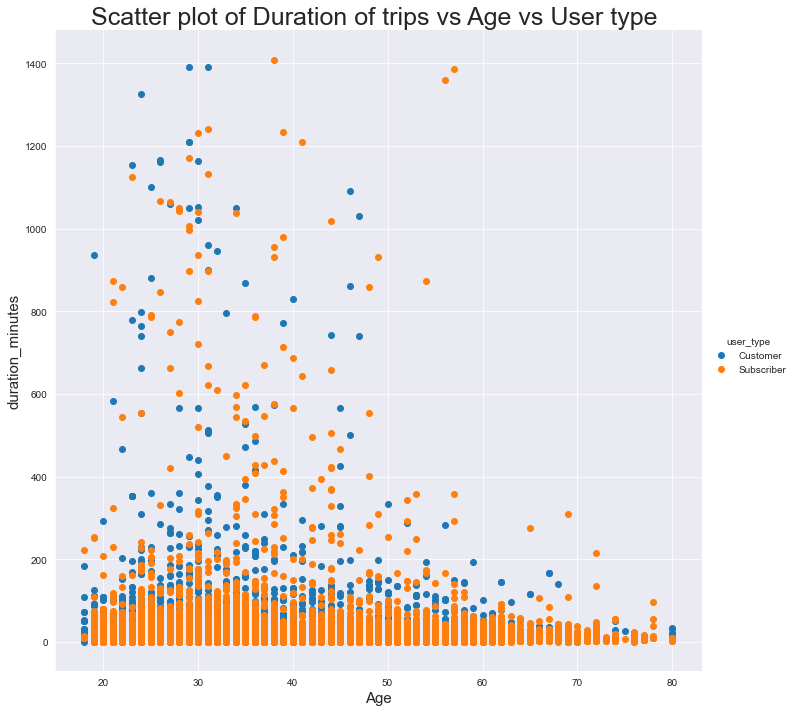

In [51]:
#Scatter plot using non-positonal encoding
g = sb.FacetGrid(data = ford_df, hue = 'user_type', height = 10)
plt.title('Scatter plot of Duration of trips vs Age vs User type ', fontsize=25)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Duration', fontsize=15)
g.map(plt.scatter, 'Age', 'duration_minutes');
g.add_legend();
       

The pie chart shows that the Subscribers are 90.53% of total riders. This is a reasonable percentage for Ford GoBike as a business. However, if they were looking to convert more customers to subscribers, they could take an approach to incentivize long trips. As seen from the scatter plots, some customers take long trips. If there was an incentive for cheaper rates for longer trips as subscribers, FordGobike could get their subscriber count.

## Distribution of women riders in busiest stations

> The distribution of women in the busiest stations helps FordGobike to determine when and where ads targeted at woman would have the most effect.

In [27]:
# Subset the dataset to top 4 stations with high duration of trips 
locs = ['Market St at 10th St',
        'Powell St BART Station (Market St at 4th St)',
        'San Francisco Ferry Building (Harry Bridges Plaza)',
                'Berry St at 4th St']
top4_df = ford_df.loc[ford_df['start_station_name'].isin(locs)]


In [28]:
# Let's take a look at gender groups in time and stations
df_f = top4_df.query('member_gender == "Female"')
df_m = top4_df.query('member_gender == "Male"')


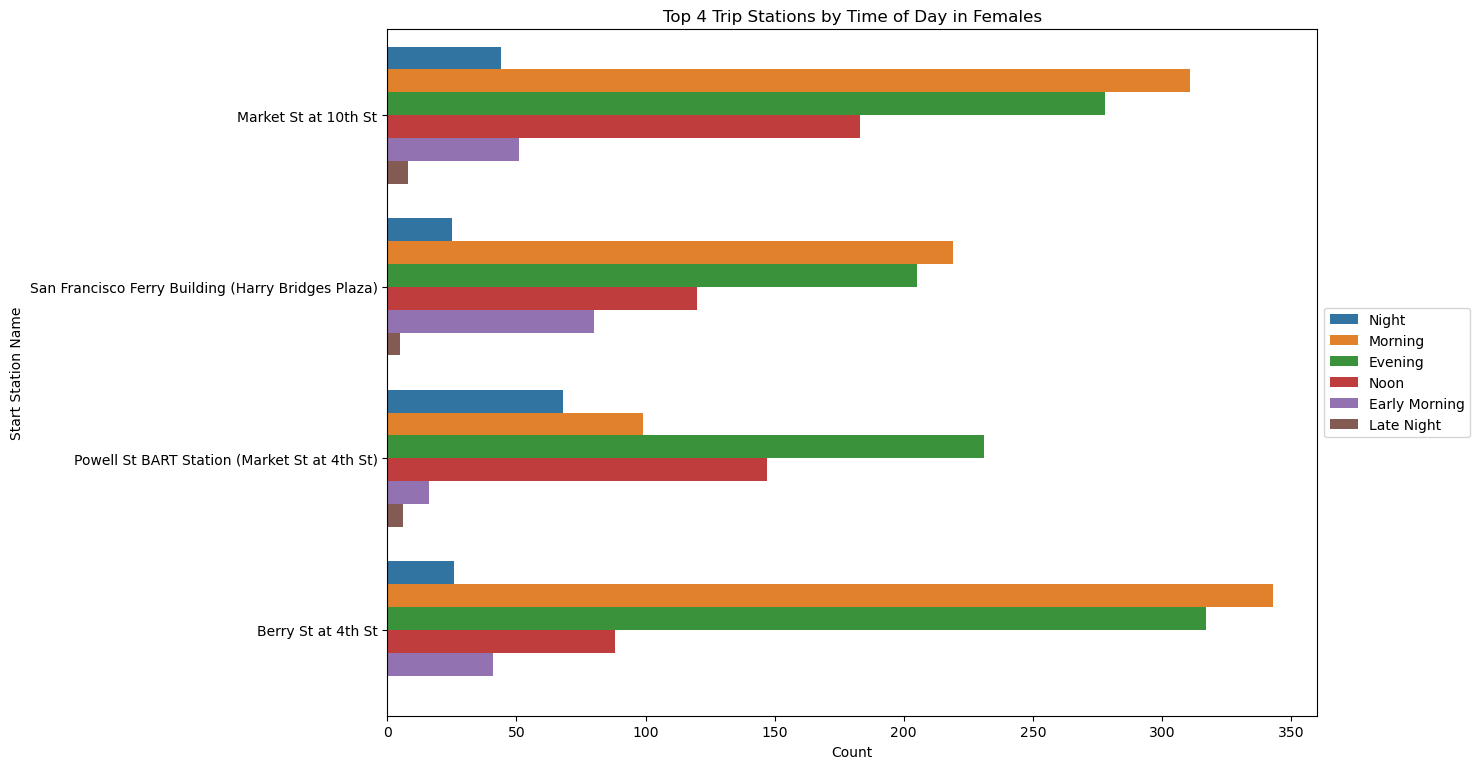

In [35]:
# Top 4 stations for women 
# categorical variables using countplot: Time of day
plt.figure(figsize=(12,20), dpi=100)
ax = plt.subplot(211)
sb.countplot(data=df_f, y='start_station_name', hue='start_hour')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 4 Trip Stations by Time of Day in Females')
plt.xlabel('Count')
plt.ylabel('Start Station Name');


From the visualization, we can see that Berry St at 4th St has the most female riders in the mornings, followed by Market St at 10th St at that same time.

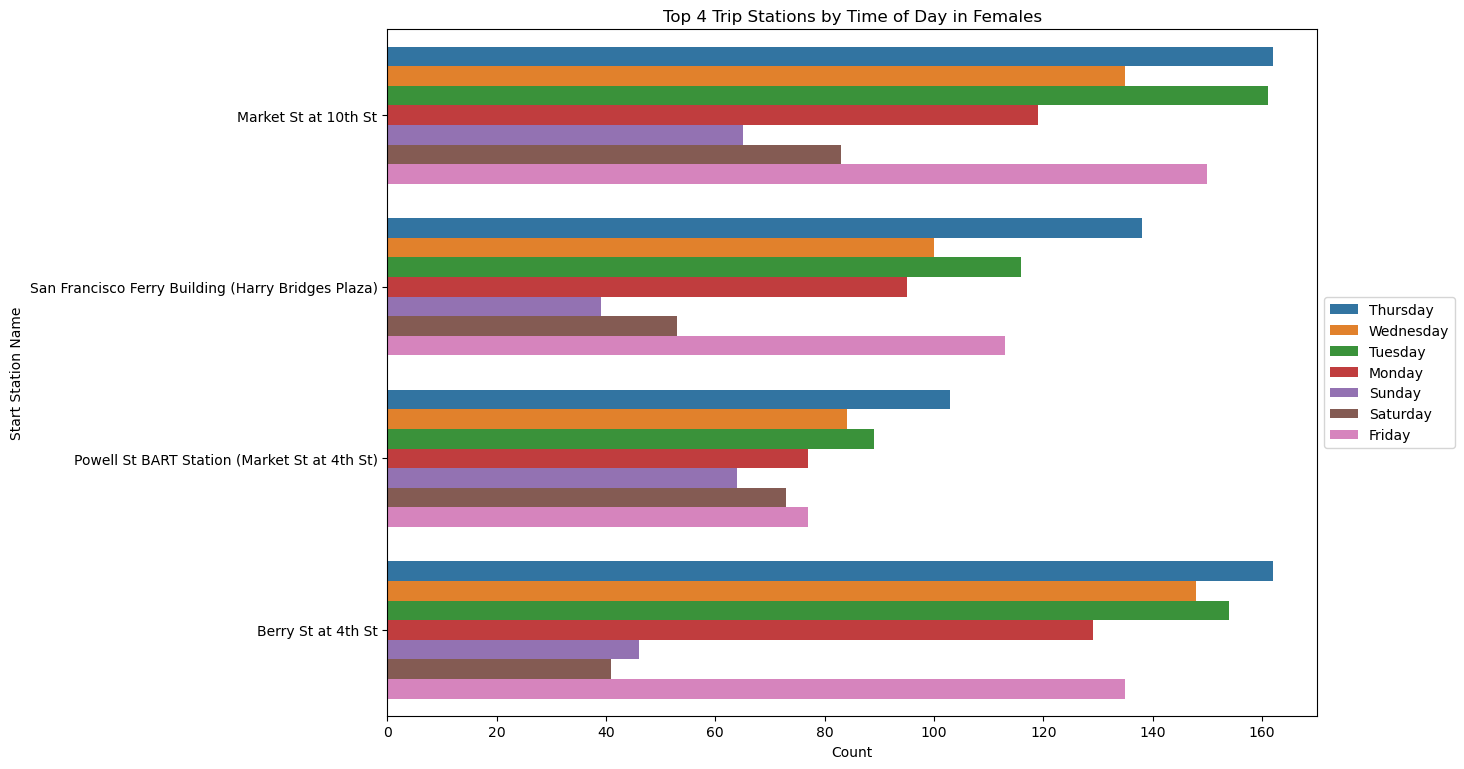

In [37]:
# Top 4 stations for women
# categorical variables using countplot: weekday
plt.figure(figsize=(12,20), dpi=100)
ax = plt.subplot(211)
sb.countplot(data=df_f, y='start_station_name', hue='start_weekday')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 4 Trip Stations by Time of Day in Females')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

From the visualization above, we can see that Berry St at 4th St and Market St at 10th St has the most female riders on thursdays.

This tells us that for ads targeted to women the best location and time for the most reach is Berry St at 4th St on Thursday mornings.

## (Distribution of men riders in busiest stations)

>The distribution of women in the busiest stations helps FordGobike to determine when and where ads targeted at woman would have the most effect.


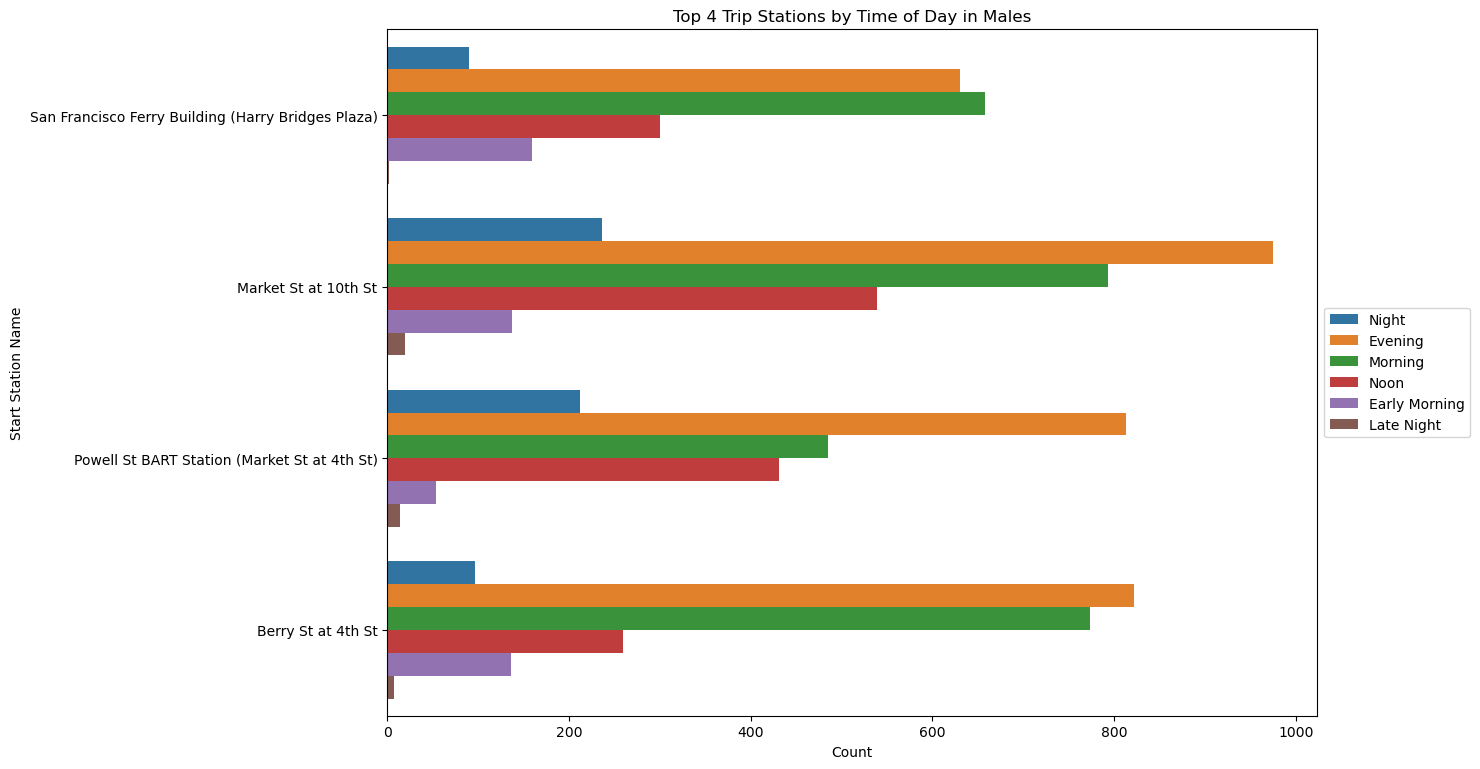

In [39]:
# Top 4 trip stations by times in each gender
# categorical variables using countplot: Time of day
plt.figure(figsize=(12,20), dpi=100)
ax = plt.subplot(212)
sb.countplot(data=df_m, y='start_station_name', hue='start_hour')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 4 Trip Stations by Time of Day in Males')
plt.xlabel('Count')
plt.ylabel('Start Station Name');


From the visualization, we can see that Berry St at 4th St has the most male riders in the mornings, followed by Market St at 10th St at that same time.

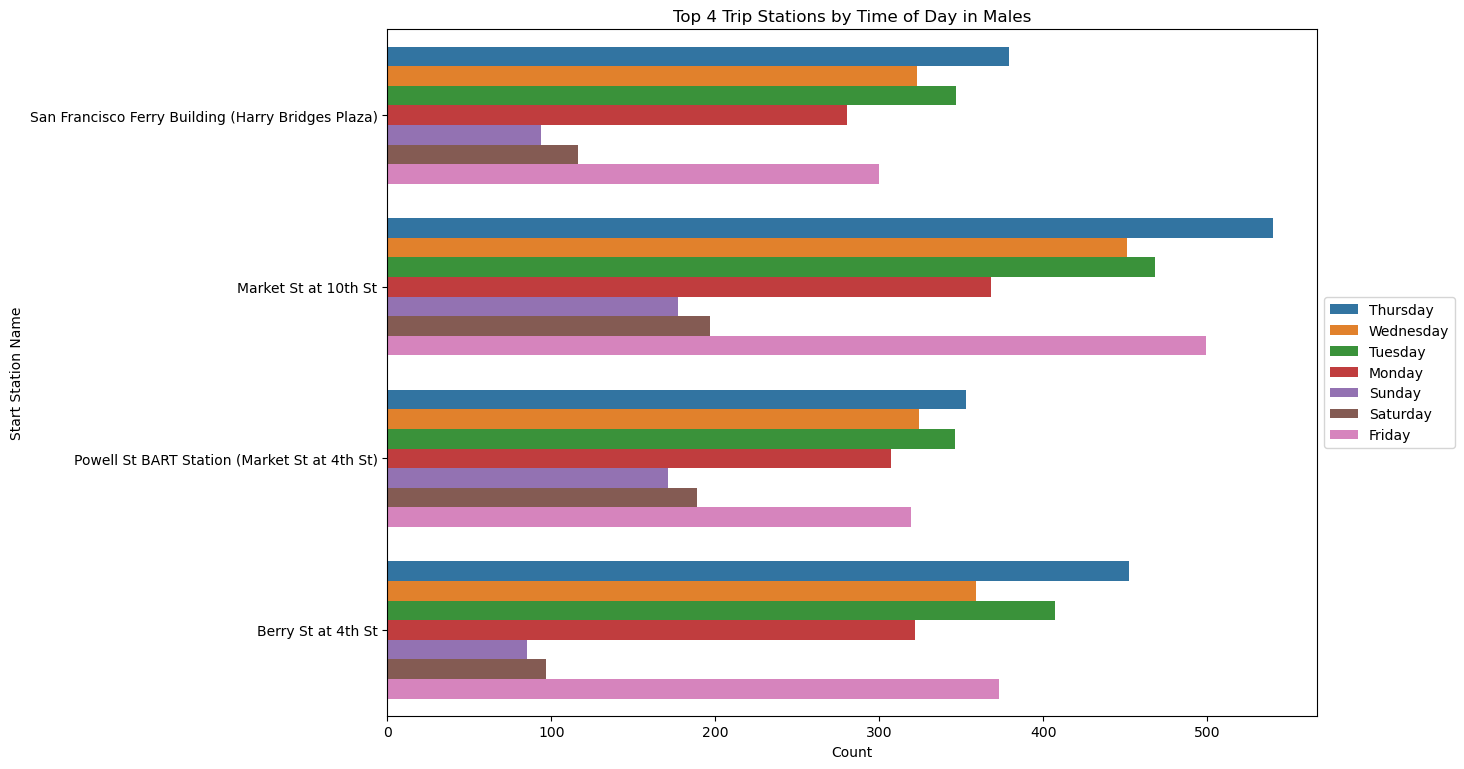

In [40]:
# Top 4 trip stations by times in each gender
# categorical variables using countplot: weekday
plt.figure(figsize=(12,20), dpi=100)
ax = plt.subplot(212)
sb.countplot(data=df_m, y='start_station_name', hue='start_weekday')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 4 Trip Stations by Time of Day in Males')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

From the visualization above, we can see that Market St at 10th St has the most male riders on thursdays, followed by Berry St at 4th St on the same day.

This tells us that for ads targeted to men the best location and time for the most reach is Market St at 10th St on Thursday mornings.

## Age groups of Riders

> Through the mean age of riders we get an idea of the age group of riders at different times. This also helps to predict times that specific ads would reach certain age groups.

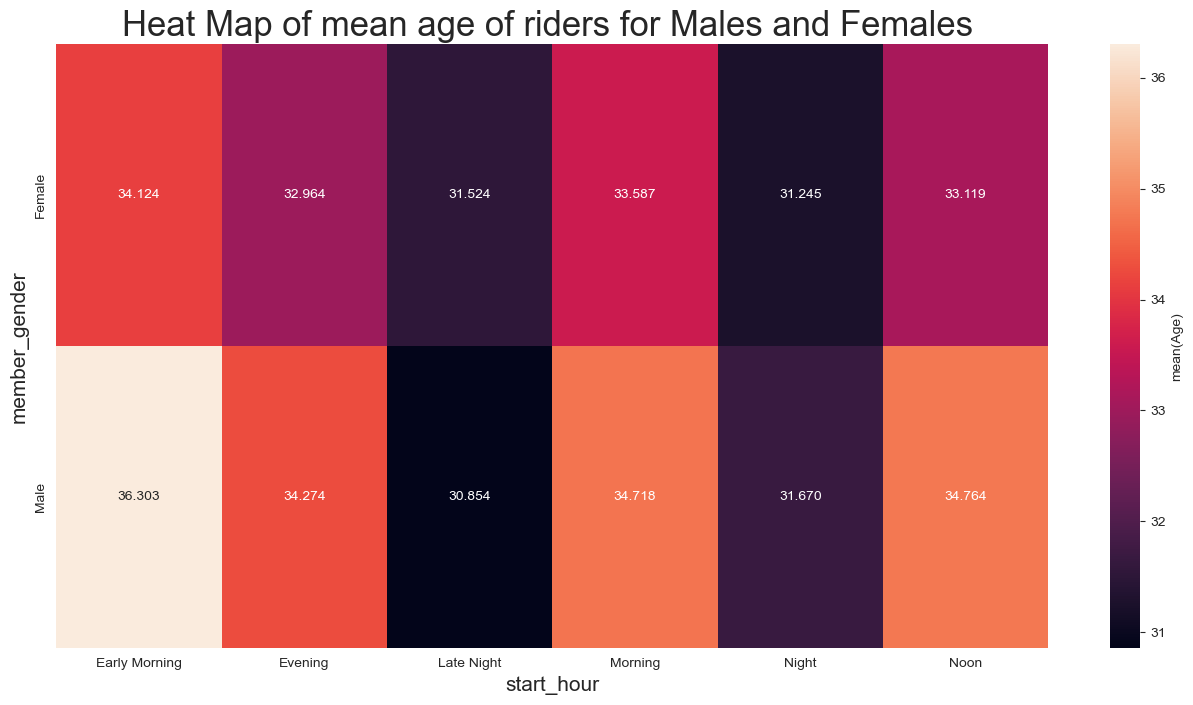

In [50]:
#heat map to depict mean of ages
avg_age = ford_df.groupby(['start_hour', 'member_gender']).mean()['Age']
avg_age = avg_age.reset_index(name = 'Age_avg')
avg_age = avg_age.pivot(index = 'member_gender', columns = 'start_hour',
                            values = 'Age_avg')
plt.figure(figsize=(16,8), dpi = 100)
plt.title('Heat Map of mean age of riders for Males and Females ', fontsize=25)
plt.xlabel('Start hour', fontsize=15)
plt.ylabel('Gender', fontsize=15);
sb.heatmap(avg_age, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(Age)'});

The heat map shows the mean ages of riders at different times of the day. It shows that, on average, older men ride in the early mornings, the same for women. It also shows that younger men are likely to ride late at night more. While younger women tend to ride more at night and late at night.

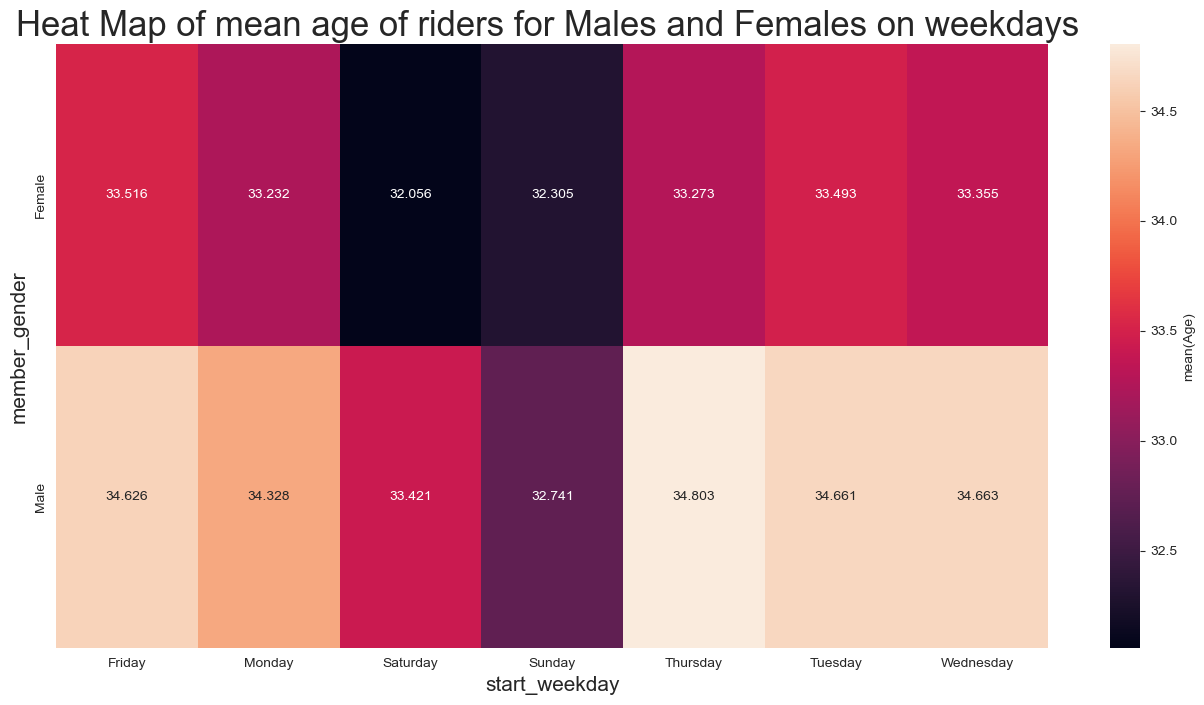

In [53]:
#heat map to depict mean of duration
avg_age2 = ford_df.groupby(['start_weekday', 'member_gender']).mean()['Age']
avg_age2 = avg_age2.reset_index(name = 'Age_avg')
avg_age2 = avg_age2.pivot(index = 'member_gender', columns = 'start_weekday',
                            values = 'Age_avg')
plt.figure(figsize=(16,8), dpi = 100)
plt.title('Heat Map of mean age of riders for Males and Females on weekdays ', fontsize=25)
plt.xlabel('Weekdays', fontsize=15)
plt.ylabel('Gender', fontsize=15);
sb.heatmap(avg_age2, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(Age)'});

The heat map shows the mean ages of riders at different times of the week. The mean ages are evenly distributed across the weekdays for men and women, with a drop on weekends. Women specifically seemed to have a drastic reduction in mean ages on Saturdays, meaning fewer female riders.

These heat maps tell us that to target older riders with ads it will be pointless to put up such an ad on the weekends at night.

## Most used bikes

> For the purpose of maintenance of bikes, we need to know the most used bikes based on number of trips and duration of trips.

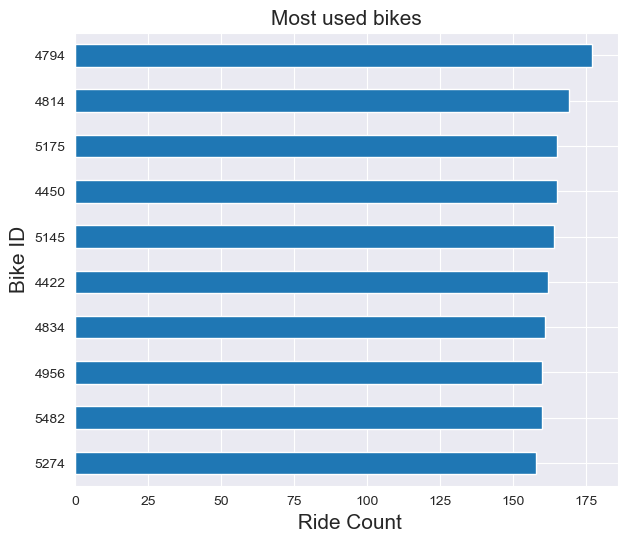

In [49]:
#to be more specific the top 10 most used bikes
plt.figure(figsize=(7,6), dpi = 100)
plt.title('Most used bikes', fontsize=15)
plt.xlabel(' Ride Count',fontsize=15)
plt.ylabel('Bike ID', fontsize=15)
ford_df.bike_id.value_counts(ascending=True).tail(10).plot.barh();


The bar plot shows the most used bikes according to the total number of trips the bike has done.

In [45]:
bikes=ford_df.groupby('bike_id')['duration_minutes'].sum()
bike=bikes.nlargest(10)

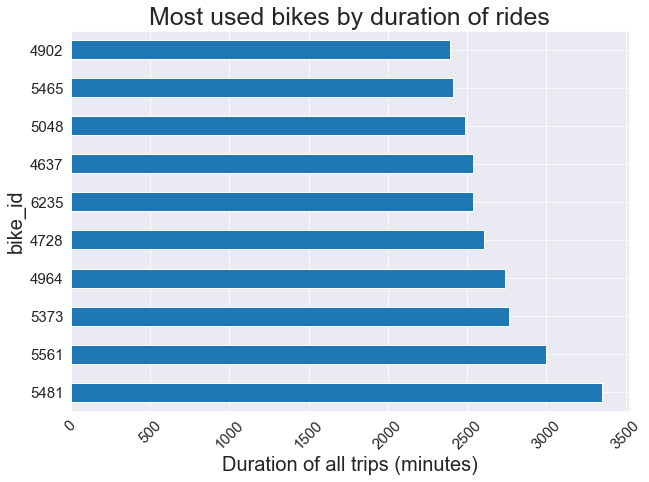

In [46]:
sb.set_style('darkgrid')
plt.xlabel('Duration of all trips (minutes)', fontsize = 20)
plt.ylabel('Bikes', fontsize = 20)
plt.xticks(rotation=45)
plt.title('Most used bikes by duration of rides', fontsize = 25)
bike.plot.barh( figsize=(10,7), fontsize = 15);

The bar plot shows the most used bikes according to the total duration of trips(in minutes), which i think is a better measure than number of trips.

However, based on what Ford GoBike decides as a policy, whether number of trips or duration of trips, the most used bikes should undergo maintenance.